In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import gc

color = sns.color_palette()
%matplotlib inline

In [3]:
properties_og = pd.read_csv('properties_2016.csv')
transactions_og = pd.read_csv('train_2016_v2.csv')

/Users/Patrick/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1) Convert 64 bit floats to 32 bit

In [23]:
for c, dtype in zip(properties_og.columns, properties_og.dtypes):
    if dtype == np.float64:
        properties_og[c] = properties_og[c].astype(np.float32)

In [24]:
train_og = transactions_og.merge(properties_og, how='left', on='parcelid')

## XGBoost

### 1) Initialize train_y, train_xvars, feature names

In [25]:
train_y = train_og['logerror'].values
train_x = train_og.drop(['parcelid', 'logerror', 'transactiondate','propertyzoningdesc', 'propertycountylandusecode'], axis = 1)
feat_names = train_x.columns.values

In [29]:
for c in train_x.dtypes[train_x.dtypes == object].index.values:
    train_x[c] = (train_x[c] == True)

### 2) Set parameters

In [26]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

### 3) Set train matrix and model

In [30]:
dtrain = xgb.DMatrix(train_x, train_y, feature_names=train_x.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)

### 4) Visualize Feature Importance

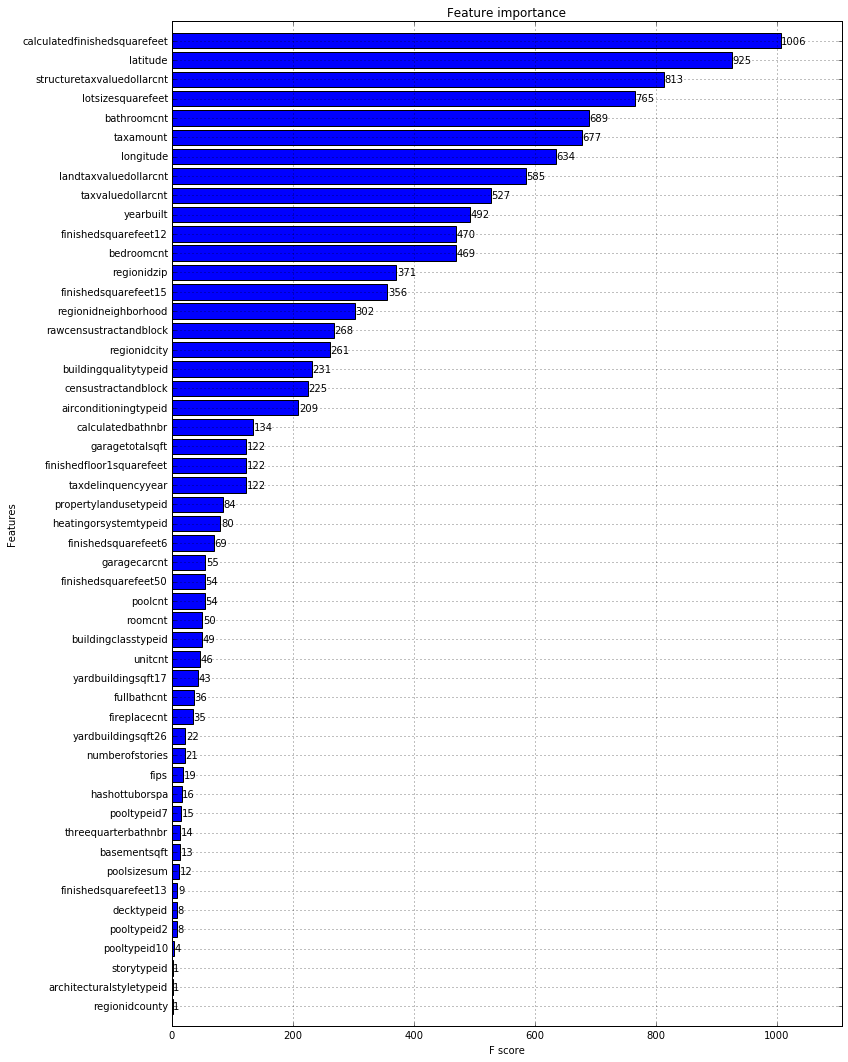

In [32]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()